# **Patient Survival Prediction**

### Objective: 
Predict survival of patients based on their age and other important features

### About Dataset:
Intensive Care Units (ICUs) often lack verified medical histories for incoming patients. A patient in distress or a patient who is brought in confused or unresponsive may not be able to provide information about chronic conditions such as heart disease, injuries, or diabetes. Medical records may take days to transfer, especially for a patient from another medical provider or system. Knowledge about chronic conditions can inform clinical decisions about patient care and ultimately improve patient's survival outcomes.

THE GLOBAL OPEN SOURCE SEVERITY OF ILLNESS SCORE (GOSSIS)

Raffa, Jesse1; Johnson, Alistair1; Celi, Leo Anthony2,,1; Pollard, Tom1; Pilcher, David3; Badawi, Omar4 33: THE GLOBAL OPEN SOURCE SEVERITY OF ILLNESS SCORE (GOSSIS), Critical Care Medicine: January 2019 - Volume 47 - Issue 1 - p 17
doi: 10.1097/01.ccm.0000550825.30295.dd

Copyright © 2018 by the Society of Critical Care Medicine and Wolters Kluwer Health, Inc. All Rights Reserved.

Source of the dataset: https://journals.lww.com/ccmjournal/Citation/2019/01001/33__THE_GLOBAL_OPEN_SOURCE_SEVERITY_OF_ILLNESS.36.aspx

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)

In [2]:
# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
# custom black theme
custom_params = {"axes.facecolor": "black","axes.edgecolor" : "black", "axes.grid": True, "axes.axisbelow": True, "axes.labelcolor": "white","figure.facecolor": "black","grid.color": "#17202A","text.color": "white","xtick.color": "white","ytick.color": "white","axes.spines.left": False,"axes.spines.bottom": False,"axes.spines.right": False,"axes.spines.top": False,}
sns.set_theme(style='whitegrid', rc=custom_params, font_scale=1.5)

Reading Data

In [4]:
df = pd.read_csv('Dataset.csv')

In [5]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

<h1><b><i>Data Preprocessing and Cleaning</i></b></h1>

In [6]:
df.shape

(91713, 186)

In [7]:
df.isnull().sum().sum()

5743492

In [8]:
df.isnull().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64

In [9]:
df2 = df.copy()

Selecting features which has less than 2000 Null values

In [10]:
df = df[['encounter_id','patient_id','hospital_id','hospital_death','age','bmi',
        'elective_surgery','ethnicity','gender','height','icu_admit_source','icu_id','icu_stay_type','icu_type',
        'pre_icu_los_days','readmission_status','weight','apache_2_diagnosis','apache_3j_diagnosis',
        'apache_post_operative','arf_apache','gcs_eyes_apache','gcs_motor_apache','gcs_unable_apache',
        'gcs_verbal_apache','heart_rate_apache','intubated_apache',
        'map_apache','resprate_apache','temp_apache','ventilated_apache','d1_diasbp_max','d1_diasbp_min',
        'd1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min','d1_heartrate_max',
        'd1_heartrate_min','d1_mbp_max','d1_mbp_min', 'd1_mbp_noninvasive_max','d1_mbp_noninvasive_min','d1_resprate_max',
        'd1_resprate_min','d1_spo2_max','d1_spo2_min','d1_sysbp_max','d1_sysbp_min',
        'd1_sysbp_noninvasive_max','d1_sysbp_noninvasive_min','d1_temp_max','d1_temp_min','h1_diasbp_max','h1_diasbp_min','h1_diasbp_noninvasive_max',
        'h1_diasbp_noninvasive_min','h1_heartrate_max','h1_heartrate_min','aids','cirrhosis','diabetes_mellitus','hepatic_failure',
        'immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis','apache_3j_bodysystem','apache_2_bodysystem']]

In [11]:
df.isnull().sum().sum()

83221

In [12]:
df.shape

(91713, 67)

### Dropping remaining null values

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(71880, 67)

In [15]:
df.duplicated().sum()

0

In [16]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type',
       'pre_icu_los_days', 'readmission_status', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_ma

In [17]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,Floor,92,admit,CTICU,0.541667,0,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
5,33181,74489,83,0,67.0,27.560000,0,Caucasian,M,190.5,Accident & Emergency,95,admit,Med-Surg ICU,0.000694,0,100.0,301.0,403.01,0,0.0,4.0,6.0,0.0,5.0,113.0,0.0,130.0,35.0,36.6,0.0,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
10,105427,125898,77,0,72.0,28.257052,1,Hispanic,F,154.9,Operating Room / Recovery,113,admit,Med-Surg ICU,0.004861,0,67.8,303.0,1304.08,1,0.0,4.0,6.0,0.0,5.0,101.0,0.0,72.0,15.0,36.8,0.0,72.0,53.0,72.0,53.0,101.0,67.0,93.0,70.0,93.0,70.0,23.0,14.0,99.0,92.0,145.0,95.0,145.0,95.0,37.0,36.7,72.0,56.0,72.0,56.0,90.0,70.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory


In [18]:
df['hospital_id'].value_counts()

19     3039
188    2746
118    2601
196    2414
70     2378
       ... 
29        2
91        2
95        2
130       2
23        2
Name: hospital_id, Length: 144, dtype: int64

In [19]:
df.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.0,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.0,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000,71880.000000
mean,65590.724513,65616.997482,105.956998,0.082290,62.243406,29.310131,0.157262,169.797118,515.581539,0.804147,0.0,84.497443,183.284210,542.710797,0.178575,0.029132,3.456859,5.472621,0.0,3.987479,100.336770,0.141110,88.320353,25.820964,36.425025,0.312577,89.494992,50.117599,89.494560,50.129855,103.411074,70.583208,105.041068,64.769338,105.017807,64.757540,28.738856,12.942724,99.264524,90.644268,148.863731,96.676920,148.835559,96.688539,37.287493,36.278761,75.989928,63.381733,76.015456,63.416987,92.618127,84.104661,0.000974,0.017195,0.229271,0.014385,0.028269,0.007666,0.004188,0.021912
std,37771.205594,37781.914996,63.469979,0.274808,16.879458,8.346261,0.364050,10.754426,224.186390,2.396352,0.0,25.126560,86.165083,451.575326,0.382999,0.168177,0.953519,1.278399,0.0,1.564061,30.930366,0.348138,42.117023,15.064665,0.830684,0.463547,19.495439,13.321468,19.498195,13.326439,22.060520,16.940559,20.413296,15.636542,20.359714,15.618474,10.415321,4.932690,1.638806,9.585267,25.374271,20.402299,25.397964,20.404355,0.692348,0.724194,18.400039,16.415850,18.410000,16.429879,21.926608,20.383650,0.031192,0.130000,0.420367,0.119073,0.165742,0.087218,0.064576,0.146396
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-0.244444,0.0,38.600000,101.000000,101.010000,0.000000,0.000000,1.000000,1.000000,0.0,1.000000,30.000000,0.000000,40.000000,4.000000,32.100000,0.000000,46.000000,13.000000,46.000000,13.000000,58.000000,0.000000,60.000000,22.000000,60.000000,22.000000,14.000000,0.000000,0.000000,0.000000,90.000000,41.000000,90.000000,41.030000,35.100000,31.889000,37.000000,22.000000,37.000000,22.000000,46.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32793.750000,32942.750000,47.000000,0.000000,52.000000,23.717173,0.000000,162.600000,374.000000,0.036806,0.0,67.300000,113.000000,203.010000,0.000000,0.000000,3.000000,6.000000,0.0,4.000000,87.000000,0.000000,54.000000,11.000000,36.200000,0.000000,76.000000,42.000000,76.000000,42.000000,88.000000,60.000000,91.000000,55.000000,91.000000,55.000000,22.000000,10.000000,99.000000,90.000000,131.000000,83.000000,131.000000,83.000000,36.900000,36.100000,63.000000,52.000000,63.000000,52.000000,77.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000

<h1><b><i>Data Visualization</i></b></h1>

Finding hospitals which has lowest and highest number of death reported

In [20]:
hospitals = df.groupby('hospital_id').sum().reset_index()
hospital_id_vs_deaths = hospitals.sort_values(['hospital_death'], ascending=False)
hospital_id_vs_deaths_highest = hospital_id_vs_deaths.head(30)
hospital_id_vs_deaths_lowest = hospital_id_vs_deaths.tail(30)

Plotting hospitals with highest number of deaths

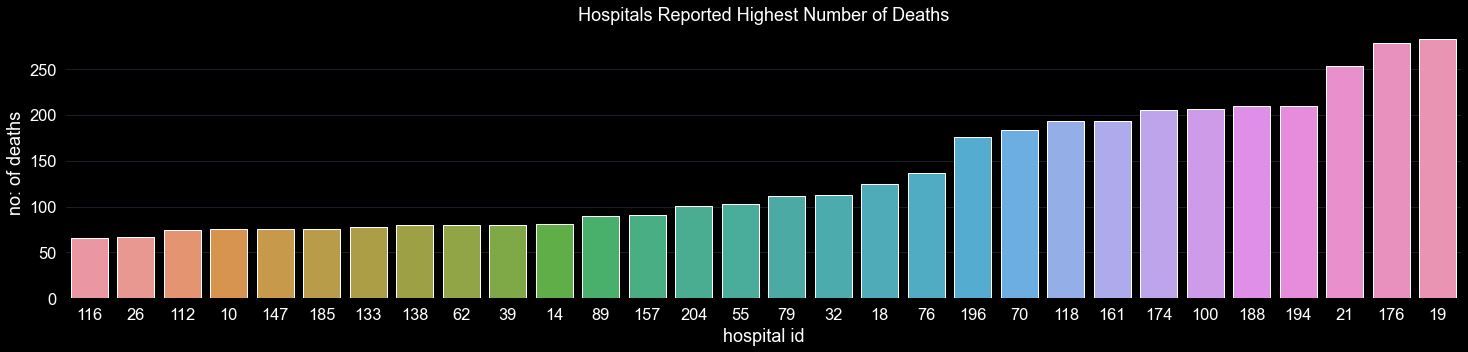

In [21]:
plt.figure(figsize=(25,5))
sns.barplot(x='hospital_id', y='hospital_death', data=hospital_id_vs_deaths_highest, 
            order=hospital_id_vs_deaths_highest.sort_values('hospital_death').hospital_id)
plt.title('Hospitals Reported Highest Number of Deaths')
plt.ylabel('no: of deaths')
plt.xlabel('hospital id')
plt.show()

Plotting hospitals with lowest number of deaths

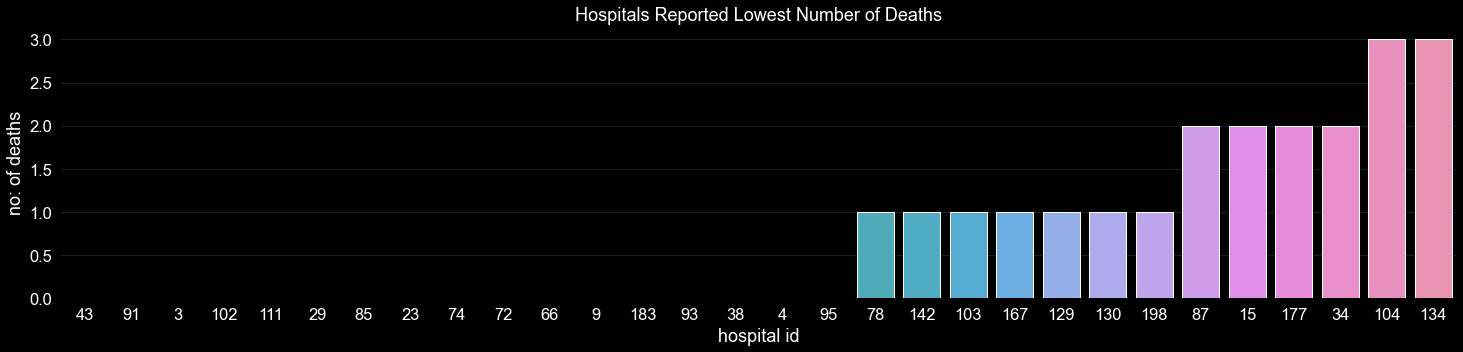

In [22]:
plt.figure(figsize=(25,5))
sns.barplot(x='hospital_id', y='hospital_death', data=hospital_id_vs_deaths_lowest, 
            order=hospital_id_vs_deaths_lowest.sort_values('hospital_death').hospital_id)
plt.title('Hospitals Reported Lowest Number of Deaths')
plt.ylabel('no: of deaths')
plt.xlabel('hospital id')
plt.show()

Plotting relation between Age and Death Rate

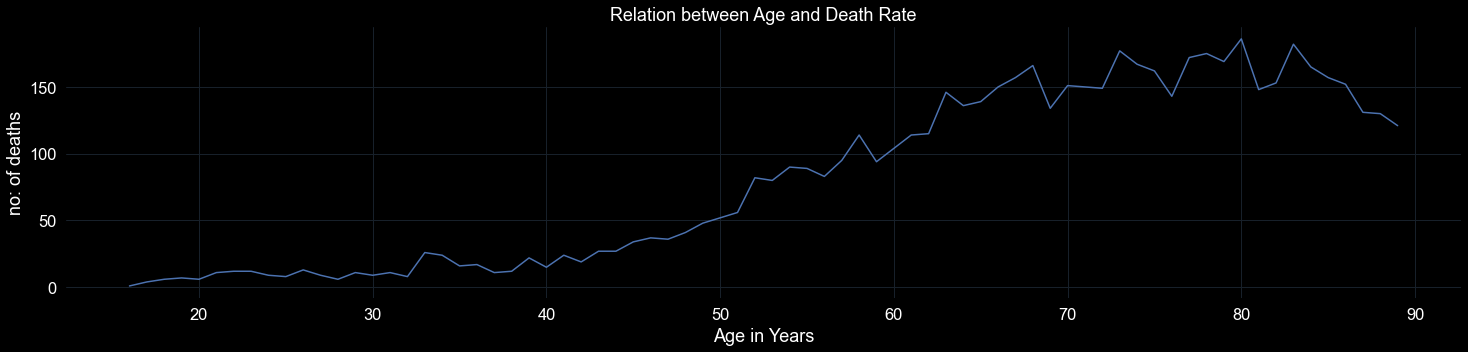

In [23]:
age = df.groupby('age').sum().reset_index()
plt.figure(figsize=(25,5))
sns.lineplot(x='age', y='hospital_death', data=age)
plt.title('Relation between Age and Death Rate')
plt.ylabel('no: of deaths')
plt.xlabel('Age in Years')
plt.show()

Plotting relation between ethnicity and death rate

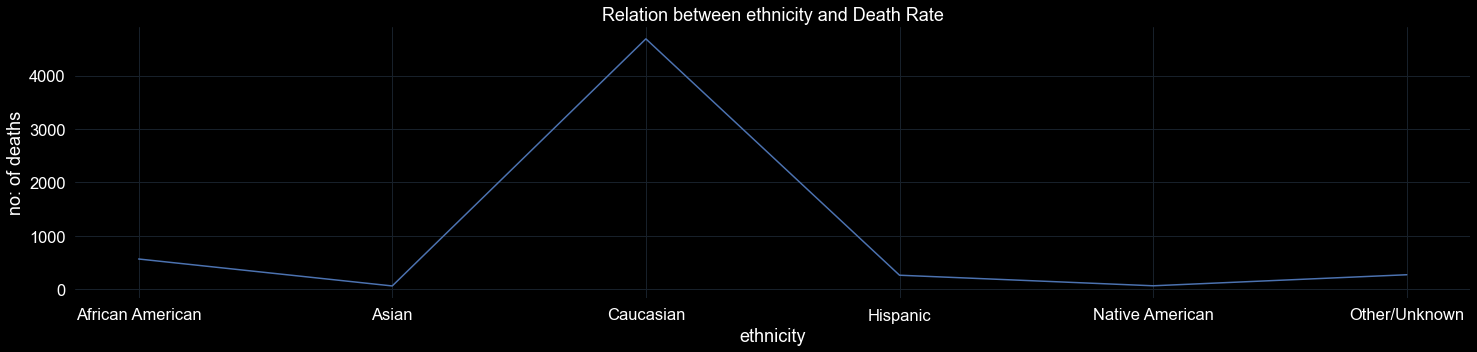

In [24]:
ethnicity = df.groupby('ethnicity').sum().reset_index()
plt.figure(figsize=(25,5))
sns.lineplot(x='ethnicity', y='hospital_death', data=ethnicity)
plt.title('Relation between ethnicity and Death Rate')
plt.ylabel('no: of deaths')
plt.xlabel('ethnicity')
plt.show()

Plotting relation between gender and death rate

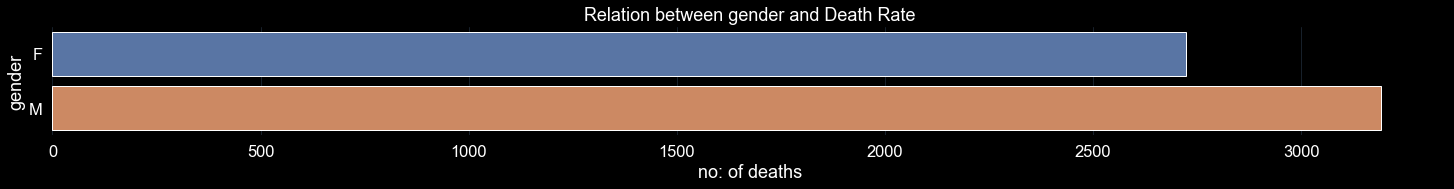

In [25]:
gender = df.groupby('gender').sum().reset_index()
plt.figure(figsize=(25,2))
sns.barplot(x='hospital_death', y='gender', data=gender)
plt.title('Relation between gender and Death Rate')
plt.xlabel('no: of deaths')
plt.ylabel('gender')
plt.show()

In [26]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,Floor,92,admit,CTICU,0.541667,0,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
5,33181,74489,83,0,67.0,27.560000,0,Caucasian,M,190.5,Accident & Emergency,95,admit,Med-Surg ICU,0.000694,0,100.0,301.0,403.01,0,0.0,4.0,6.0,0.0,5.0,113.0,0.0,130.0,35.0,36.6,0.0,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
10,105427,125898,77,0,72.0,28.257052,1,Hispanic,F,154.9,Operating Room / Recovery,113,admit,Med-Surg ICU,0.004861,0,67.8,303.0,1304.08,1,0.0,4.0,6.0,0.0,5.0,101.0,0.0,72.0,15.0,36.8,0.0,72.0,53.0,72.0,53.0,101.0,67.0,93.0,70.0,93.0,70.0,23.0,14.0,99.0,92.0,145.0,95.0,145.0,95.0,37.0,36.7,72.0,56.0,72.0,56.0,90.0,70.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory


Relation between ICU admit source and death rate

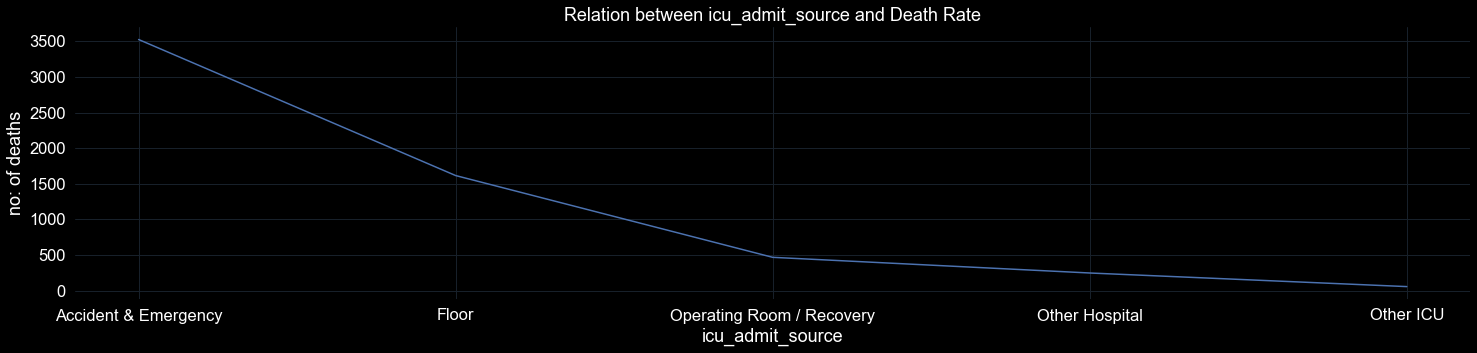

In [27]:
icu_admit_source = df.groupby('icu_admit_source').sum().reset_index()
plt.figure(figsize=(25,5))
sns.lineplot(x='icu_admit_source', y='hospital_death', data=icu_admit_source)
plt.title('Relation between icu_admit_source and Death Rate')
plt.ylabel('no: of deaths')
plt.xlabel('icu_admit_source')
plt.show()

#### Creating a temporary dataframe for plotting

In [28]:
temp = df.drop(['ethnicity','icu_admit_source','gender','icu_stay_type',
            'icu_type','apache_3j_bodysystem','apache_2_bodysystem'],axis=1)

#### Checking relation of survived and not survived in all the features

<Figure size 432x288 with 0 Axes>

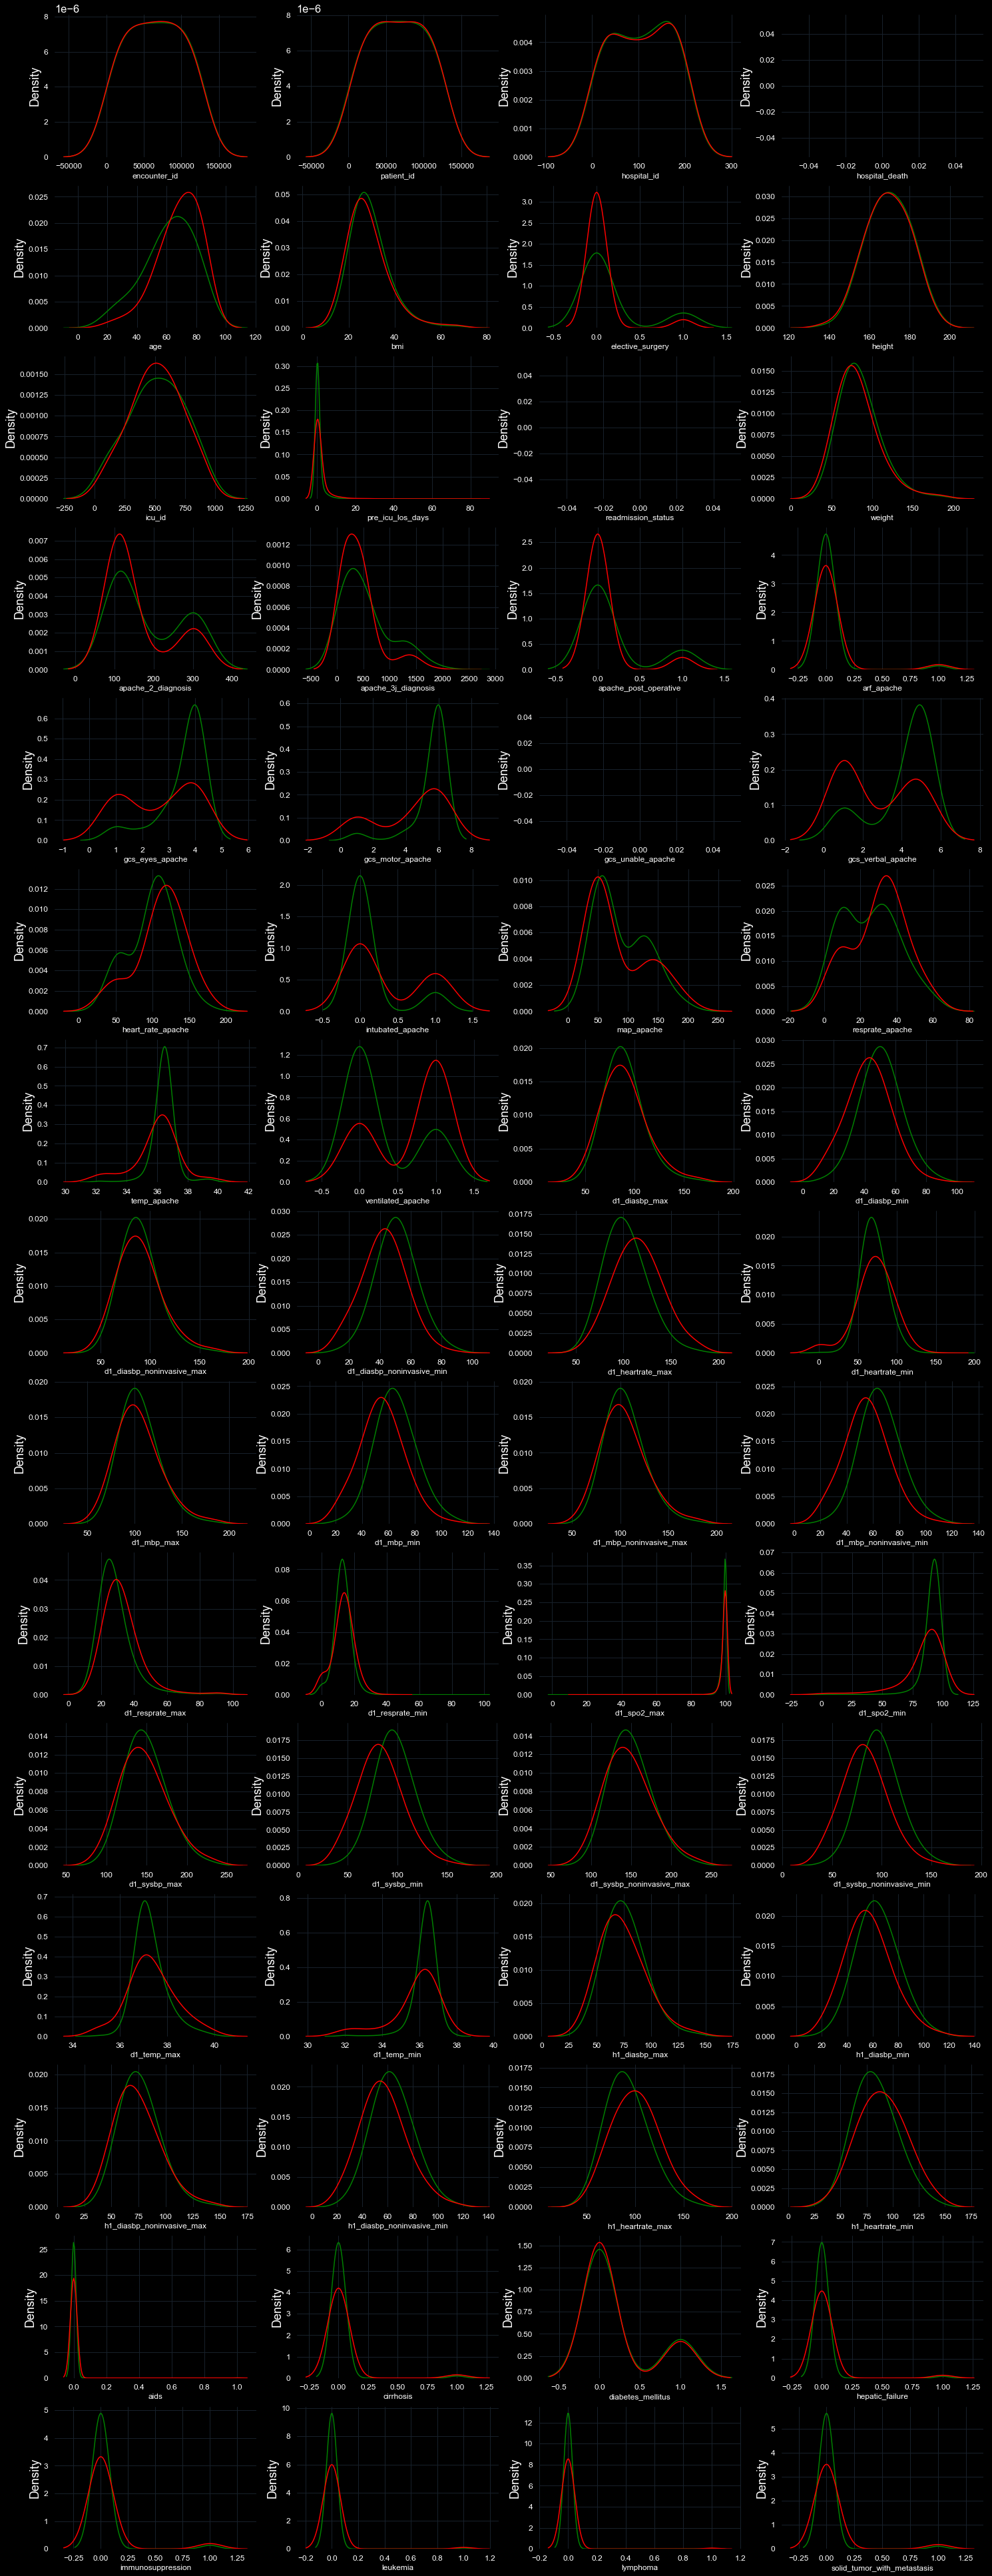

In [29]:
var = temp.columns.values

i = 0
t0 = temp.loc[temp['hospital_death'] == 0]
t1 = temp.loc[temp['hospital_death'] == 1]

plt.figure()
fig, ax = plt.subplots(15,4,figsize=(25,70))

for feature in var:
    i += 1
    plt.subplot(15,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="hospital_death = 0", color='Green')
    sns.kdeplot(t1[feature], bw=0.5,label="hospital_death = 1", color='Red')
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

# for checking relationship of each feature with survival rate
# Red Color - Not Survived
# Green Color - Survived

In [30]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,Floor,92,admit,CTICU,0.541667,0,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
5,33181,74489,83,0,67.0,27.560000,0,Caucasian,M,190.5,Accident & Emergency,95,admit,Med-Surg ICU,0.000694,0,100.0,301.0,403.01,0,0.0,4.0,6.0,0.0,5.0,113.0,0.0,130.0,35.0,36.6,0.0,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
10,105427,125898,77,0,72.0,28.257052,1,Hispanic,F,154.9,Operating Room / Recovery,113,admit,Med-Surg ICU,0.004861,0,67.8,303.0,1304.08,1,0.0,4.0,6.0,0.0,5.0,101.0,0.0,72.0,15.0,36.8,0.0,72.0,53.0,72.0,53.0,101.0,67.0,93.0,70.0,93.0,70.0,23.0,14.0,99.0,92.0,145.0,95.0,145.0,95.0,37.0,36.7,72.0,56.0,72.0,56.0,90.0,70.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory


<h1><b><i>Preprocessing Data for Model Building</i></b></h1>

##### Creating dummy variables for converting text data into numeric data for training the model

In [31]:
dummies = pd.get_dummies(df.ethnicity) # creating dummy variables for column ethnicity
merged = pd.concat([df,dummies], axis='columns') # merging the dummies with our dataframe
merged = merged.drop(['ethnicity'], axis=1) # dropping the original ethnicity column
merged = merged.iloc[:, :-1] # dropping one of the dummies column from dataframe

Repeating the above step for the columns: 
 - icu_admit_source
 - gender
 - icu_stay_type
 - icu_type
 - apache__3j_bodysystem
 - apache_2_bodysystem

In [32]:
dummies = pd.get_dummies(merged.icu_admit_source)
merged = pd.concat([merged,dummies], axis='columns')
merged = merged.drop(['icu_admit_source'], axis=1)
merged = merged.iloc[:, :-1]

In [33]:
dummies = pd.get_dummies(merged.gender)
merged = pd.concat([merged,dummies], axis='columns')
merged = merged.drop(['gender'], axis=1)
merged = merged.iloc[:, :-1]

In [34]:
dummies = pd.get_dummies(merged.icu_stay_type)
merged = pd.concat([merged,dummies], axis='columns')
merged = merged.drop(['icu_stay_type'], axis=1)
merged = merged.iloc[:, :-1]

In [35]:
dummies = pd.get_dummies(merged.icu_type)
merged = pd.concat([merged,dummies], axis='columns')
merged = merged.drop(['icu_type'], axis=1)
merged = merged.iloc[:, :-1]

In [36]:
dummies = pd.get_dummies(merged.apache_3j_bodysystem)
merged = pd.concat([merged,dummies], axis='columns')
merged = merged.drop(['apache_3j_bodysystem'], axis=1)
merged = merged.iloc[:, :-1]

In [37]:
dummies = pd.get_dummies(merged.apache_2_bodysystem)
merged = pd.concat([merged,dummies], axis='columns')
merged = merged.drop(['apache_2_bodysystem'], axis=1)
merged = merged.iloc[:, :-1]

In [38]:
merged.shape

(71880, 98)

In [39]:
merged.head(2)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,African American,Asian,Caucasian,Hispanic,Native American,Accident & Emergency,Floor,Operating Room / Recovery,Other Hospital,F,admit,readmit,CCU-CTICU,CSICU,CTICU,Cardiac ICU,MICU,Med-Surg ICU,Neuro ICU,Cardiovascular,Gastrointestinal,Genitourinary,Gynecological,Hematological,Metabolic,Musculoskeletal/Skin,Neurological,Respiratory,Sepsis,Cardiovascular,Gastrointestinal,Haematologic,Metabolic,Neurologic,Renal/Genitourinary,Respiratory,Trauma,Undefined Diagnoses
0,66154,25312,118,0,68.0,22.73,0,180.3,92,0.541667,0,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
1,114252,59342,81,0,77.0,27.42,0,160.0,90,0.927778,0,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


Selecting dependent and independent variables

In [40]:
y = merged['hospital_death']
x = merged.drop(['hospital_death','encounter_id','patient_id','hospital_id','bmi','height','weight'],axis=1)
# dropped all features which doesnt have impact on survival

<h1><b><i>Machine Learning</i></b></h1>

### Splitting the data into training and test set

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

<h3><b><i>Decision Tree Classifier</i></b></h3>

In [42]:
model_decisionTreeClassifier = DecisionTreeClassifier()
model_decisionTreeClassifier.fit(x_train,y_train)
model_decisionTreeClassifier.score(x_test,y_test)

0.8810517529215359

In [43]:
y_predict = model_decisionTreeClassifier.predict(x_test)
confusion_matrix(y_test, y_predict)

array([[12307,   910],
       [  800,   359]], dtype=int64)

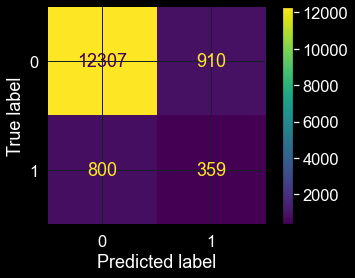

In [44]:
plot_confusion_matrix(model_decisionTreeClassifier, x_test, y_test)
plt.show()

<h3><b><i>Random Forest Classifier</i></b></h3>

In [45]:
model_randomForestClassifier = RandomForestClassifier(n_estimators=50)
model_randomForestClassifier.fit(x_train,y_train)
model_randomForestClassifier.score(x_test,y_test)

0.9291179744017808

In [46]:
y_predict = model_randomForestClassifier.predict(x_test)
confusion_matrix(y_test, y_predict)

array([[13129,    88],
       [  931,   228]], dtype=int64)

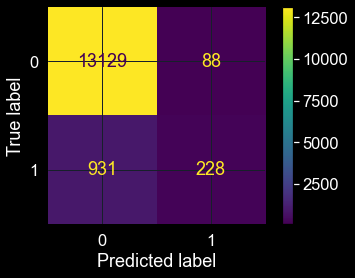

In [47]:
plot_confusion_matrix(model_randomForestClassifier, x_test, y_test)
plt.show()

<h3><b><i>Extra Trees Classifier</i></b></h3>

In [48]:
model_extraTreesClassifier = ExtraTreesClassifier()
model_extraTreesClassifier.fit(x_train,y_train)
model_extraTreesClassifier.score(x_test,y_test)

0.9269616026711185

In [49]:
y_predict = model_extraTreesClassifier.predict(x_test)
confusion_matrix(y_test, y_predict)

array([[13139,    78],
       [  972,   187]], dtype=int64)

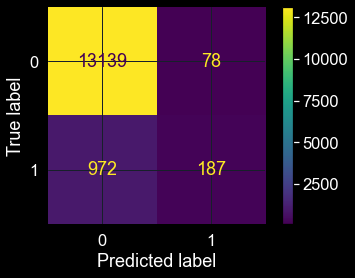

In [50]:
plot_confusion_matrix(model_extraTreesClassifier, x_test, y_test)
plt.show()

<h3><b><i>KNeighbours Classifier</i></b></h3>

In [51]:
model_kneighbors = KNeighborsClassifier(n_neighbors=5)
model_kneighbors.fit(x_train,y_train)
model_kneighbors.score(x_test,y_test)

0.9183361157484696

In [52]:
y_predict = model_kneighbors.predict(x_test)
confusion_matrix(y_test, y_predict)

array([[13128,    89],
       [ 1085,    74]], dtype=int64)

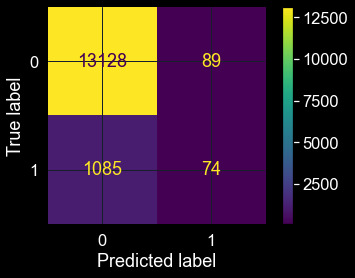

In [53]:
plot_confusion_matrix(model_kneighbors, x_test, y_test)
plt.show()

<h3><b><i>Gradient Boosting Classifier</i></b></h3>

In [54]:
model_gradientBoostingClassifier = GradientBoostingClassifier()
model_gradientBoostingClassifier.fit(x_train,y_train)
model_gradientBoostingClassifier.score(x_test,y_test)

0.930370061213133

In [55]:
y_predict = model_gradientBoostingClassifier.predict(x_test)
confusion_matrix(y_test, y_predict)

array([[13085,   132],
       [  869,   290]], dtype=int64)

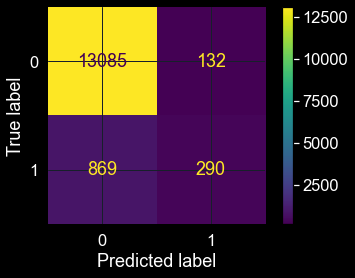

In [56]:
plot_confusion_matrix(model_gradientBoostingClassifier, x_test, y_test)
plt.show()

<h3><b><i>GaussianNB</i></b></h3>

In [57]:
model_gaussianNB = GaussianNB()
model_gaussianNB.fit(x_train,y_train)
model_gaussianNB.score(x_test,y_test)

0.7909015025041736

In [58]:
y_predict = model_gaussianNB.predict(x_test)
confusion_matrix(y_test, y_predict)

array([[10562,  2655],
       [  351,   808]], dtype=int64)

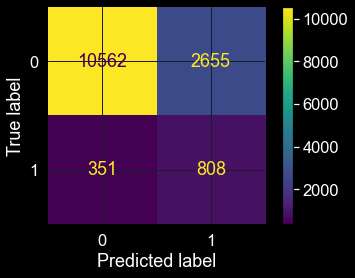

In [59]:
plot_confusion_matrix(model_gaussianNB, x_test, y_test)
plt.show()

<h1><b><i>Results</i></b></h1>

The tables bellow shows the accuracy for each model.

| ID | Model Name | Accuracy Percentage |
| :-: | :------------------------------------------: | :--------------------: |
|  1 | DecisionTreeClassifier | 88 |
|  2 | RandomForestClassifier | 92 |
|  3 | ExtraTreesClassifier | 92 |
|  4 | KNeighborsClassifier | 91 |
|  **5** | **GradientBoostingClassifier** | **93** |
|  6 | GaussianNB | 79 |

### Gradient Boosting Classifier got the best accuracy. So, we will use this model for prediction.